# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

Questa sezione è dedicata a domande più specifiche sui alcuni film o attori

In [ ]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
data_directory = "../data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')

## Analizzo e pulisco i dati

Reviews_rotten_df

In [3]:
reviews_rotten_df.dtypes

rotten_tomatoes_link    object
movie_title             object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [4]:
reviews_rotten_df = reviews_rotten_df[['movie_title','critic_name','top_critic','publisher_name','review_type','review_score']]
reviews_rotten_df

,movie_title,critic_name,top_critic,publisher_name,review_type,review_score
0,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN
1,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN
2,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN
3,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5
4,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN
...,...,...,...,...,...,...
1129882,Zulu Dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5
1129883,Zulu Dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5
1129884,Zulu Dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+
1129885,Zulu Dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5


In [5]:
duplicati = reviews_rotten_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

120775


In [6]:
reviews_rotten_df = reviews_rotten_df.drop_duplicates()

## Il film “Please Give” è piaciuto più al pubblico o ai critici?

In [7]:
please_give_df = reviews_rotten_df[reviews_rotten_df['movie_title']=='Please Give'].copy()

In [8]:
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

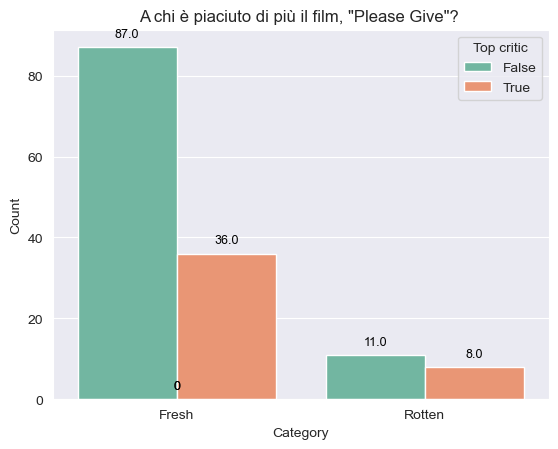

In [47]:
ax = sns.countplot(x='review_type', hue='top_critic', data=please_give_df, palette='Set2')
plt.title('A chi è piaciuto di più il film, "Please Give"? ')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Top critic')
add_count_on_bars(ax)
plt.show()

## Quale film della saga "Hunger Games" è stato maggiormente apprezzato dal pubblico?

In [64]:
harry_potter_df = reviews_rotten_df[reviews_rotten_df['movie_title'].str.match(r'^Harry Potter\b', na=False)]

harry_potter_df

,movie_title,critic_name,top_critic,publisher_name,review_type,review_score
404101,Harry Potter and the Chamber of Secrets,Ross Anthony,False,Hollywood Report Card,Fresh,3.5/4
404102,Harry Potter and the Chamber of Secrets,John Hiscock,True,Daily Telegraph (UK),Fresh,NaN
404103,Harry Potter and the Chamber of Secrets,Todd McCarthy,True,Variety,Fresh,NaN
404104,Harry Potter and the Chamber of Secrets,Kirk Honeycutt,True,Hollywood Reporter,Rotten,NaN
404105,Harry Potter and the Chamber of Secrets,Paul Arendt,False,Teletext,Fresh,NaN
...,...,...,...,...,...,...
406198,Harry Potter and the Sorcerer's Stone,Rachel Wagner,False,rachelsreviews.net,Fresh,B-
406199,Harry Potter and the Sorcerer's Stone,Guillem Martinez Oya,False,Cinematismo,Fresh,4/5
406200,Harry Potter and the Sorcerer's Stone,Debbie Lynn Elias,False,Behind The Lens,Fresh,NaN
406201,Harry Potter and the Sorcerer's Stone,Leigh Paatsch,False,Herald Sun (Australia),Fresh,4/5


In [57]:
nomi_univoci = prova['movie_title'].unique()
nomi_univoci


array(['Harry Potter and the Chamber of Secrets',
       'Harry Potter and the Deathly Hallows - Part 1',
       'Harry Potter and the Deathly Hallows - Part 2',
       'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Prisoner of Azkaban',
       "Harry Potter and the Sorcerer's Stone"], dtype=object)

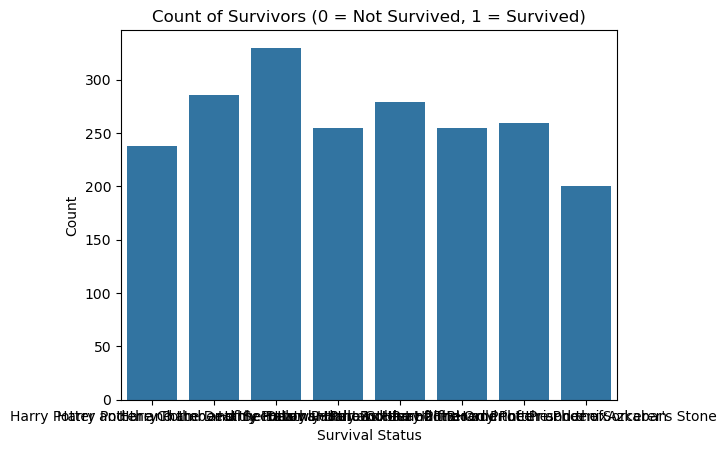

In [65]:
sns.countplot(x='movie_title', data=harry_potter_df)
plt.title('Count of Survivors (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

Adesso ho contato il numero di recensione per film, ora devo selezionare solo le recensioni quelle belle